In [1]:
# import necessary library
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from ast import literal_eval
import itertools
import re

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="darkgrid")
sns.set_palette(sns.color_palette('pastel')) 


In [2]:
# Load the cleaned data
df1=pd.read_csv('cleaned/clean_data.csv')

In [3]:
# drop the null values of date
df1.dropna(subset=["release_date"],inplace=True)

In [4]:
df1['release_date'] = pd.to_datetime(df1['release_date'], errors='coerce')
df1['year']=df1.release_date.dt.year
df1['month']=df1.release_date.dt.month

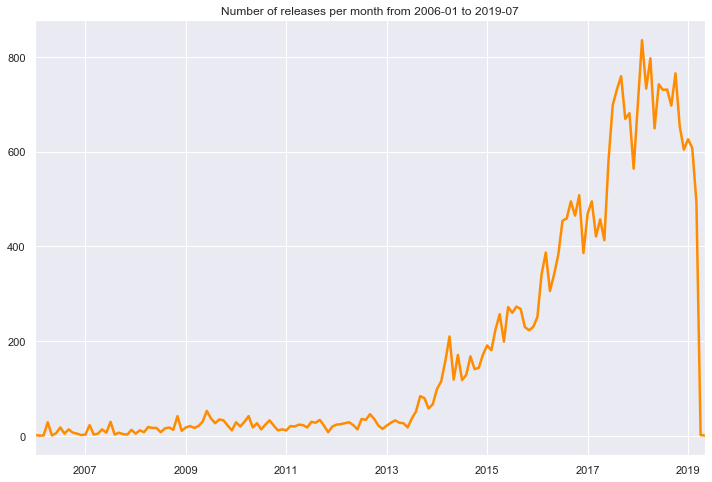

In [5]:
df_resample=((df1.groupby([df1[df1.year>=2006].release_date.dt.year,df1[df1.year>=2006].release_date.dt.month])['name']).count())
time=pd.date_range('2006-01', freq='M',periods=161)
resample=pd.Series(df_resample.values,index=time)
resample.plot(kind="line", title="Number of releases per month from 2006-01 to 2019-07", 
              color="darkorange", figsize=(12,8), linewidth = 2.5)
plt.savefig('ppt/figure01.png')

In [6]:
# 按年度上市量考察
grouped=df1.groupby(df1.year)['name']

df_Y=grouped.count()
# 以2006年为分水岭
df_Y1=df_Y[(df_Y.index<2006)]
df_Y2=df_Y[(df_Y.index>=2006)]
# 将series转化为dataframe
df_Y1 = df_Y1.reset_index(name="Count By Year")
df_Y2 = df_Y2.reset_index(name="Count By Year")

In [7]:
# 2006年之前没什么游戏
df_Y1

,year,Count By Year
0,1997,1
1,1998,1
2,1999,2
3,2000,2
4,2001,4
5,2002,1
6,2003,3
7,2004,6
8,2005,6


Text(0.5, 1.0, 'Number of releases by years')

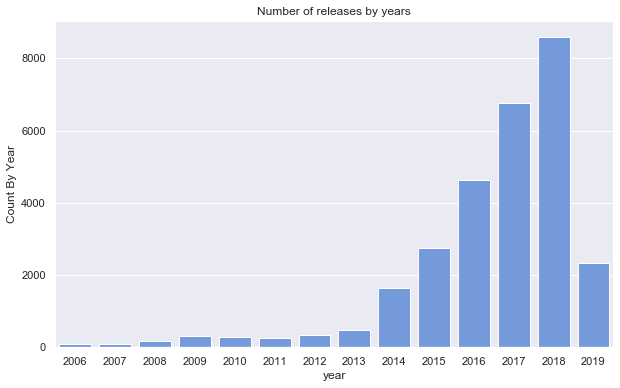

In [8]:
sns.set(rc={'figure.figsize':(10, 6)})

Y=sns.barplot(x=df_Y2['year'], y=df_Y2["Count By Year"], data=df_Y2, color="cornflowerblue")

Y.set_title('Number of releases by years')

In [9]:
# 考察季节性
df_M = df1[df1.year<2019].groupby(df1.month)['name'].count()
df_M = df_M.reset_index(name="Count By Month")
df_M

,month,Count By Month
0,1,1506
1,2,1825
2,3,2121
3,4,2065
4,5,2225
5,6,1878
6,7,2313
7,8,2472
8,9,2512
9,10,2660


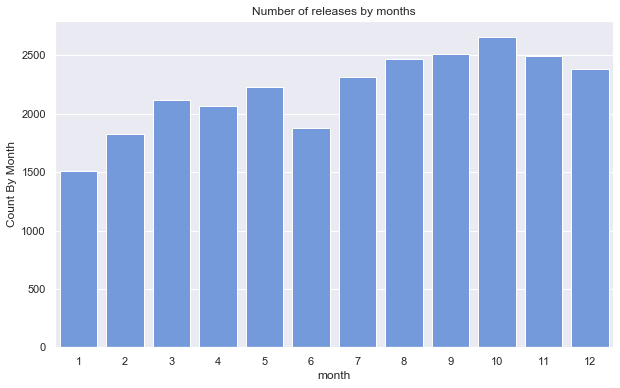

In [10]:
sns.set(rc={'figure.figsize':(10,6)})
M=sns.barplot(x=df_M['month'], y=df_M["Count By Month"], data=df_M, color="cornflowerblue")
M.set_title('Number of releases by months')

plt.savefig("ppt/figure02.png")

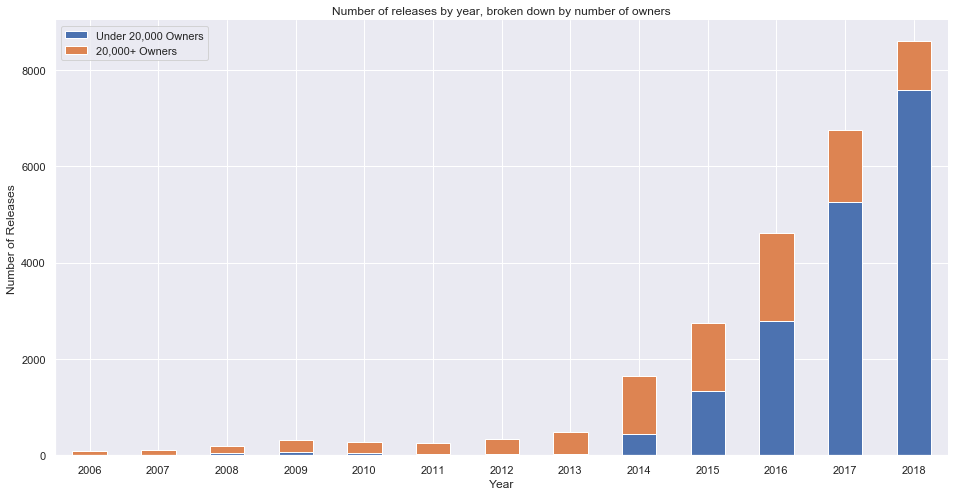

In [11]:
df2 = df1.copy()

years = []
lt_20k = []
gt_20k = []

for year in sorted(df2['year'].unique()):
    if year < 2006 or year > 2018:
        # very few releases in data prior to 2006, and we're still in 2019 (at time of writing)
        # so ignore these years
        continue
    
    # subset dataframe by year
    year_df = df2[df2.year == year]
    
    # calculate total with less than 20,000 owners, and total with 20,000 or more
    total_lt_20k = year_df[year_df.owners < 20000].shape[0]
    total_gt_20k = year_df[year_df.owners >= 20000].shape[0]
    
    years.append(year)
    lt_20k.append(total_lt_20k)
    gt_20k.append(total_gt_20k)
    
owners_df = pd.DataFrame(zip(years, lt_20k, gt_20k), 
                         columns=['year', 'Under 20,000 Owners', '20,000+ Owners'])

ax = owners_df.plot(x='year', y=[1, 2], kind='bar', stacked=True, figsize=(16,8))
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.set_xlabel("Year")
ax.set_ylabel('Number of Releases')
ax.set_title('Number of releases by year, broken down by number of owners')
sns.despine()
plt.savefig("ppt/figure03.png")
plt.show()


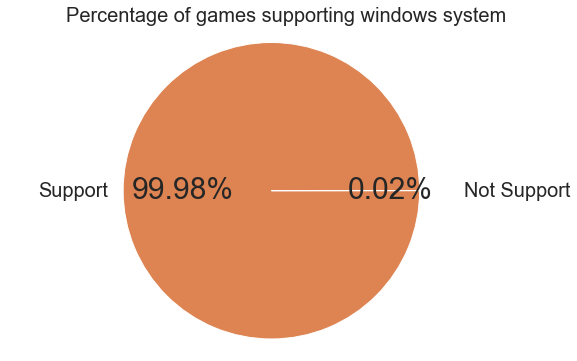

In [12]:
df_win=df2.groupby(df2.sup_windows)['sup_windows'].count()
# 返回l_text_Win是图注字体，p_text_Win是饼里面的字体
patches_Win,l_text_Win,p_text_Win=plt.pie(df_win,labels=['Not Support','Support'],autopct='%1.2f%%',explode=(0,0.2)) 
# 设置题目和字体大小
plt.title("Percentage of games supporting windows system").set_size(20)
# 通过遍历设置字体大小
for t in l_text_Win:
    t.set_size(20)
for t in p_text_Win:
    t.set_size(30)
plt.axis('equal')
plt.savefig('ppt/figure04.png')
plt.show()

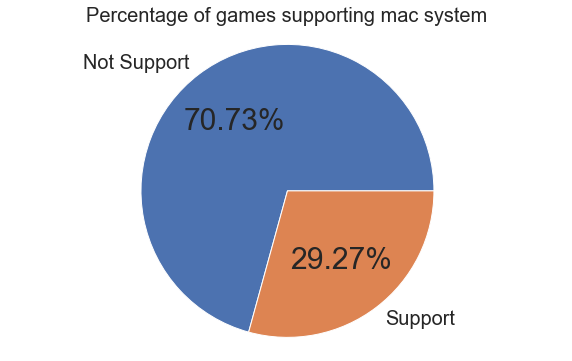

In [13]:
df_mac=df2.groupby(df2.sup_mac)["sup_mac"].count()
patches_mac,l_text_mac,p_text_mac=plt.pie(df_mac,labels=['Not Support','Support'],autopct='%1.2f%%') 
# 设置题目和字体大小
plt.title("Percentage of games supporting mac system").set_size(20)
# 通过遍历设置字体大小
for t in l_text_mac:
    t.set_size(20)
for t in p_text_mac:
    t.set_size(30)
plt.axis('equal')
plt.savefig('ppt/figure05.png')
plt.show()

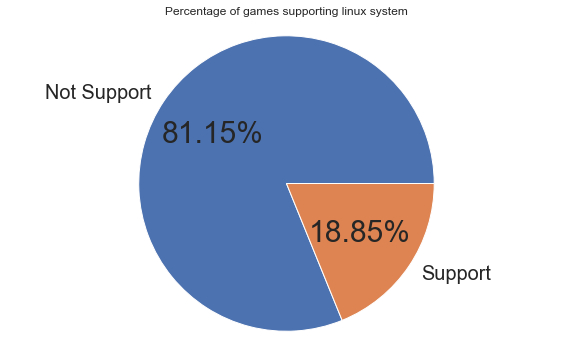

In [14]:
df_linux=df2.groupby(df2.sup_linux)['sup_linux'].count()
patches_linux,l_text_linux,p_text_linux=plt.pie(df_linux,labels=['Not Support','Support'],autopct='%1.2f%%')
# 设置题目和字体大小
plt.title("Percentage of games supporting mac system").set_size(20)
# 通过遍历设置字体大小
for t in l_text_linux:
    t.set_size(20)
for t in p_text_linux:
    t.set_size(30)
plt.axis('equal')
plt.title("Percentage of games supporting linux system")
plt.savefig('ppt/figure06.png')
plt.show()

In [15]:
# 调用这个函数，将developers和publishers从list里面搞出来
def process_developers_and_publishers(df):
    """Parse columns as semicolon-separated string."""
    # remove rows with missing data (~ means not)
    df = df[(df['developers'].notnull()) & (df['publishers'] != "['']")].copy()
    df = df[~(df['developers'].str.contains(';')) & ~(df['publishers'].str.contains(';'))]
    df = df[(df['publishers'] != "['NA']") & (df['publishers'] != "['N/A']")]
    
    # create list for each
    df['developer'] = df['developers'].apply(lambda x: ';'.join(literal_eval(x)))
    df['publisher'] = df['publishers'].apply(lambda x: ';'.join(literal_eval(x)))

    df = df.drop(['developers', 'publishers'], axis=1)
    
    return df

df2 = process_developers_and_publishers(df2)
df2[['name', 'developer', 'publisher']].head()

,name,developer,publisher
0,Counter-Strike,Valve,Valve
1,Team Fortress Classic,Valve,Valve
2,Day of Defeat,Valve,Valve
3,Deathmatch Classic,Valve,Valve
4,Half-Life: Opposing Force,Gearbox Software,Valve


In [16]:
# 玩家数量前15名的付费游戏
display_cols = ['name',  'owners',"genre",'developer','publisher', 'price']
top_ten = df2[df2.price>0].sort_values(by='owners', ascending=False).head(10)
display(top_ten[display_cols])

,name,owners,genre,developer,publisher,price
13693,PLAYERUNKNOWN'S BATTLEGROUNDS,75000000.0,"Action, Adventure, Massively Multiplayer",PUBG Corporation,PUBG Corporation,29.99
0,Counter-Strike,15000000.0,Action,Valve,Valve,9.99
10,Counter-Strike: Source,15000000.0,Action,Valve,Valve,9.99
2767,Grand Theft Auto V,15000000.0,"Action, Adventure",Rockstar North,Rockstar Games,29.99
1193,The Elder Scrolls V: Skyrim,15000000.0,RPG,Bethesda Game Studios,Bethesda Softworks,19.99
165,Garry's Mod,15000000.0,"Indie, Simulation",Facepunch Studios,Valve,9.99
1661,PAYDAY 2,15000000.0,"Action, RPG",OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,9.99
23,Portal 2,15000000.0,"Action, Adventure",Valve,Valve,9.99
21,Left 4 Dead 2,15000000.0,Action,Valve,Valve,9.99
13,Half-Life 2: Deathmatch,15000000.0,Action,Valve,Valve,4.99


In [17]:
# 玩家数量前15名的免费游戏
display_cols = ['name',  'owners',"genre",'developer','publisher', 'price']
top_ten_free = df2[df2.price==0].sort_values(by='owners', ascending=False).head(10)
display(top_ten_free[display_cols])

,name,owners,genre,developer,publisher,price
22,Dota 2,150000000.0,"Action, Free to Play, Strategy",Valve,Valve,0.0
25,Counter-Strike: Global Offensive,75000000.0,"Action, Free to Play",Valve;Hidden Path Entertainment,Valve,0.0
19,Team Fortress 2,35000000.0,"Action, Free to Play",Valve,Valve,0.0
1840,Warframe,35000000.0,"Action, Free to Play",Digital Extremes,Digital Extremes,0.0
3689,Unturned,35000000.0,"Action, Adventure, Casual, Free to Play, Indie",Smartly Dressed Games,Smartly Dressed Games,0.0
14,Half-Life 2: Lost Coast,15000000.0,Action,Valve,Valve,0.0
8644,Z1 Battle Royale: Test Server,15000000.0,Massively Multiplayer,NantG,Daybreak Game Company,0.0
1810,Heroes & Generals,15000000.0,"Action, Free to Play, Indie, Massively Multipl...",RETO MOTO,RETO MOTO,0.0
1938,War Thunder,15000000.0,"Action, Free to Play, Massively Multiplayer, S...",Gaijin Entertainment,Gaijin Entertainment,0.0
1987,Path of Exile,15000000.0,"Action, Adventure, Free to Play, Indie, Massiv...",Grinding Gear Games,Grinding Gear Games,0.0


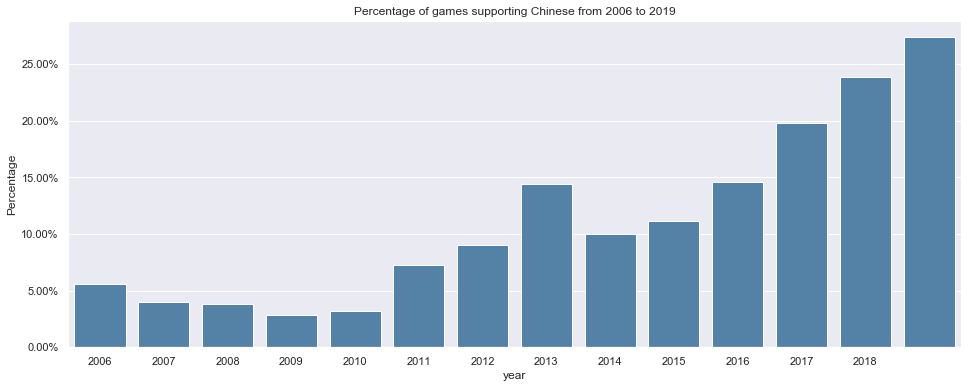

In [18]:
array_CN=(df2[(df2.year>=2006) & (df2.Chinese==True)].groupby(df2.year)['Chinese'].count()).values
array_total=df2[df2.year>=2006].groupby(df2.year)['name'].count().values
array_per=(array_CN/array_total)*100

CN=pd.DataFrame({"year":list(range(2006,2020)),"Percentage":list(array_per)},columns=["year","Percentage"])

plt.figure(figsize=(16, 6))
axcn=sns.barplot(x=CN['year'], y=CN["Percentage"], data=CN, color="steelblue")
axcn.set_xticklabels(ax.get_xticklabels(),rotation=0)
axcn.set_title("Percentage of games supporting Chinese from 2006 to 2019")
y_value=['{:,.2f}'.format(x) + '%' for x in axcn.get_yticks()]
axcn.set_yticklabels(y_value)
plt.savefig('ppt/figure09.png')